## Apply Beta-sigma on all the CRIRES Spectra

Using the berved spectra


In [37]:
from astropy.io import fits
import os
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

In [38]:
def Betasigma_check(yi, N, j, **kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N+1, j, **kwargs)
    print("    Robust estimate of noise std (N): %6.5f +/- %6.5f" % (smad, dsmad))
    print("    Robust estimate of noise std (N+1): %6.5f +/- %6.5f" % (smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad) ):
        print("consistent")
        return True
    else:
        print("N=",N, "and N=", N+1, "are not conisitent")
        return False
        
def Betasigma_j_check(yi, N, j,**kwargs):
    "Checks adjacent orders for consistency"
    bseq = pyasl.BSEqSamp()
    smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
    smad1, dsmad1 = bseq.betaSigma(yi, N, j+1, **kwargs)
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j, smad, dsmad))
    print("    Robust estimate of noise std j={}: {:6.5f} +/- {:6.5f}".format(j+1, smad1, dsmad1))
    if ( (smad1-dsmad1) < smad < (smad1+dsmad1) ) & ((smad-dsmad) < smad1 < (smad+dsmad)):
        print("consistent")
        return True
    else:
        print("j=", j, "and j=", j+1, "are not conisitent")
        return False

In [39]:
glob.glob("/home/jneal/.handy_spectra/*-mixavg-tellcorr_1_bervcorr.fits")
        

['/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD167665-2-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD202206-2-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD162020-2-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD167665-1a-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD202206-1-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD30501-3-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD202206-3-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD211847-2-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD168443-1-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD162020-1-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD168443-2-mixavg-tellcorr_1_bervcorr.fits',
 '/home/jneal/.handy_spectra/HD4747-1-m

In [45]:
targets =  ["HD30501", "HD202206","HD168443",  "HD167665", "HD202206", "HD4747", "HD162020", "HD211847" ]
chips = ["1", "2", "3", "4"]
obs = ["1", "1a", "1b", "2", "2a", "2b", "3"]
Store_dict = {}
star_obs_chip_snr = {}
star_obs_snr = {}
bseq = pyasl.BSEqSamp()
kwargs = {"returnMAD":True}
N = 5
j = 2

for star in targets:
    for this_obs in obs:
        chip_sigma = []
        for chip in chips:
            files = glob.glob("/home/jneal/.handy_spectra/{0}-{1}-mixavg-tellcorr_{2}_bervcorr.fits".format(star, this_obs, chip))
            if len(files) == 1:
                data = fits.getdata(files[0])
                wave_i, flux_i = data["wavelength"], data["flux"]

                # Calclate SNR and save to dict 
                smad, dsmad = bseq.betaSigma(flux_i, N, j, **kwargs)
                star_obs_chip_snr[(star, this_obs, chip)] = 1 / smad
                chip_sigma.append(smad)
               
            elif len(files) > 1:
                print("more than one file for ", star, this_obs, chip)
            else:
                pass
       
        combined_error = sum([c*c for c in chip_sigma])**(1/2)

        if combined_error != 0:
            star_obs_snr[(star, this_obs)] = 1 / combined_error
print("Done")
print("individual SNR")
print(star_obs_chip_snr)

# Not sure if this is correct or not
print("sigmas added in quadrature")
print(star_obs_snr)



Done
individual SNR
{('HD30501', '1', '1'): 606.4035120039435, ('HD30501', '1', '2'): 882.8619108777428, ('HD30501', '1', '3'): 867.6618090404141, ('HD30501', '1', '4'): 414.744425541669, ('HD30501', '2a', '1'): 339.51585417414395, ('HD30501', '2a', '2'): 419.6322748683186, ('HD30501', '2a', '3'): 524.4161511410332, ('HD30501', '2a', '4'): 364.56314391969033, ('HD30501', '2b', '1'): 504.48669378659156, ('HD30501', '2b', '2'): 693.6587762637056, ('HD30501', '2b', '3'): 724.3107836657873, ('HD30501', '2b', '4'): 436.5735089400485, ('HD30501', '3', '1'): 523.9045680964913, ('HD30501', '3', '2'): 676.8577871294688, ('HD30501', '3', '3'): 729.813918808226, ('HD30501', '3', '4'): 432.3507219533031, ('HD202206', '1', '1'): 297.76463482498434, ('HD202206', '1', '2'): 379.9869653669992, ('HD202206', '1', '3'): 465.40019897295565, ('HD202206', '1', '4'): 349.6074806066567, ('HD202206', '2', '1'): 350.9425546151928, ('HD202206', '2', '2'): 506.0188394398859, ('HD202206', '2', '3'): 558.3068779299

In [42]:
def betasigma_spectra(file, Nmax=5, j=1, arb=False, returnMAD=True):
    data = fits.getdata(file)
    xi, yi = data["wavelength"], data["flux"]

    mdiff = np.max(np.abs(np.diff(yi)))
    print("""Maximum absolute difference between consecutive
        values of flux: """, mdiff)

    nd = len(yi)
    print("Number of 'data points': ", nd)
    print()
    print("Very Rough std = {}".format(np.std(yi)))

    # Create class instance for equidistant sampling
    if arb:
        bsarb = pyasl.BSArbSamp()
    else:
        bseq = pyasl.BSEqSamp()
    
    # Specify jump parameter (j) for construction of beta sample
    j = j

    # Order of approximation to use
    Ns = range(Nmax+1)

    # Use to store noise estimates
    smads, dsmads = [], []

    # Loop over orders of approximation between 0 and 3
    for N in Ns:
        print("Order of approximation (N): ", N)

        # Get estimates of standard deviation based on robust (MAD-based) estimator
        if arb:
            smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            print("    Size of beta sample: ", len(bsarb.betaSample))
        else:
            smad, dsmad = bseq.betaSigma(yi, N, j, returnMAD=returnMAD)
            print("    Size of beta sample: ", len(bseq.betaSample))
        print("    Robust estimate of noise std: %6.5f +/- %6.5f" % (smad, dsmad))
        # Save result
        smads.append(smad)
        dsmads.append(dsmad)

    # Plot g(t) and the synthetic data
    plt.subplot(2,1,1)
    plt.title("Data (top) and noise estimates (bottom)")
    plt.plot(xi, yi, 'b.-', label="flux")
    #plt.errorbar(ti, yi, yerr=np.ones(nd)*istd, fmt='r+', label="$y_i$")
    plt.legend()
    plt.subplot(2,1,2)
    plt.title("N=0 is insufficient")
    plt.errorbar(Ns, smads, yerr=dsmads, fmt='k+', label="Noise estimates")
    #plt.plot([min(Ns)-0.5, max(Ns)+0.5], [np.std(flux)]*2, 'k--', label="Rough value")
    plt.legend()
    plt.xlabel("Order of approximation (N)")
    plt.ylabel("Noise STD")
    plt.tight_layout()
    plt.show()


These spectra seem to have SNR ~ 300-900 in the continuum from Beta simga estimates.

In [10]:
Betasigma_check(flux_i, 4, j=1, returnMAD=True)

    Robust estimate of noise std 0(N): 0.00208 +/- 0.00013
    Robust estimate of noise std 0(N+1): 0.00215 +/- 0.00014
consistent


In [11]:
Betasigma_j_check(flux_i, 4, j=3, returnMAD=True)

    Robust estimate of noise std j=3: 0.00252 +/- 0.00016
    Robust estimate of noise std j=4: 0.00314 +/- 0.00020
4 and 5 are not conisitent


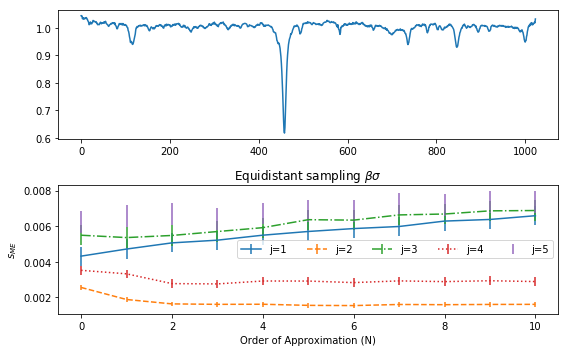

In [15]:
def betasigma_plot(flux, arb=False, **kwargs):
    import matplotlib
    # colors_array = list(matplotlib.colors.cnames.keys())
    lines_array = list(matplotlib.lines.lineStyles.keys())
    # markers_array = list(matplotlib.markers.MarkerStyle.markers)
    Ns = range(11)
    js = range(1,6)
    
    plt.figure(figsize=(8, 5))
    plt.subplot(211)
    plt.plot(flux)
    plt.subplot(212)
    for jj, j in enumerate(js):
        # Use to store noise estimates
        smads, dsmads = [], []
        for N in Ns:
            #print("Order of approximation (N): ", N)

            # Get estimates of standard deviation based on robust (MAD-based) estimator
            if arb:
                smad, dsmad = bsarb.betaSigma(xi, yi, N, j, returnMAD=returnMAD)
            else:
                bseq = pyasl.BSEqSamp()
                smad, dsmad = bseq.betaSigma(yi, N, j, **kwargs)
        # Save result
            smads.append(smad)
            dsmads.append(dsmad)
        plt.errorbar(Ns, smads, dsmad, label="j={}".format(j), linestyle=lines_array[jj])
        plt.xlabel("Order of Approximation (N)")
        plt.ylabel("$s_{ME}$")
        if arb:
            plt.title(r"Arbitray sampling $\beta\sigma$")
        else:
             plt.title(r"Equidistant sampling $\beta\sigma$")
    plt.legend(ncol=len(js))
    plt.tight_layout()
    plt.show()
    


In [ ]:
betasigma_plot(flux_i, returnMAD=True)